<a href="https://colab.research.google.com/github/mokshmahajan2004/Deep-Learning-Assignments/blob/main/Assignment4_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Name: **Moksh Mahajan**  

Roll No: **102206084**

Subgroup: **4F1C**

# Question:

Generate circular data randomly distributed and perform its binary classification.

The sample image for the generated data has been attached herewith.

Interpret the results and the performance of your model

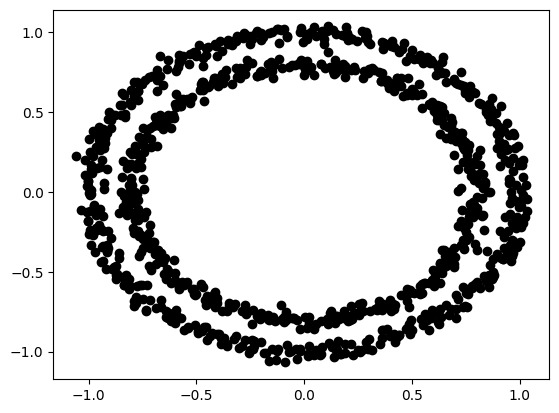

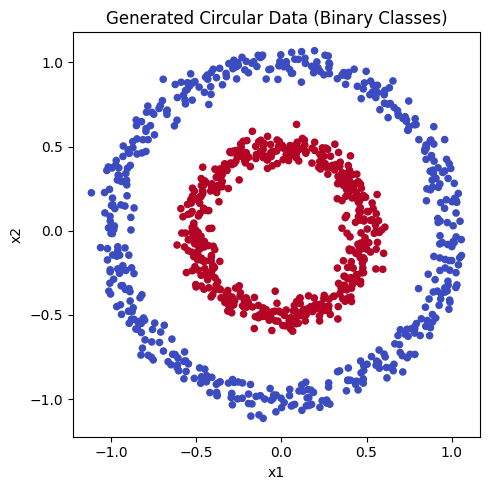


Accuracy: 1.0

Classification Report (table):



,precision,recall,f1-score,support
Class 0,1.0,1.0,1.0,150.0
Class 1,1.0,1.0,1.0,150.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,300.0
weighted avg,1.0,1.0,1.0,300.0


In [9]:
# Generate circular data, classify with neural network, evaluate performance

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier

# 1) Data
X, y = make_circles(n_samples=1000, noise=0.05, factor=0.5, random_state=42)

# Plot data
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20)
plt.title("Generated Circular Data (Binary Classes)")
plt.xlabel("x1"); plt.ylabel("x2"); plt.tight_layout()
plt.show()

# 2) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# 3) Model (2 hidden layers with ReLU)
model = MLPClassifier(
    hidden_layer_sizes=(16, 16),
    activation="relu",
    solver="adam",
    max_iter=1000,
    random_state=42
)
model.fit(X_train, y_train)

# 4) Predictions
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

# ---- Nicely formatted classification report (as a table) ----
report_dict = classification_report(
    y_test, y_pred, target_names=["Class 0", "Class 1"], output_dict=True
)
report_df = pd.DataFrame(report_dict).transpose()

print("\nAccuracy:", round(acc, 4))
print("\nClassification Report (table):\n")
try:
    # If in a notebook, this renders a clean table
    from IPython.display import display
    display(report_df)
except Exception:
    # Fallback for plain Python
    with pd.option_context("display.float_format", "{:.4f}".format):
        print(report_df)



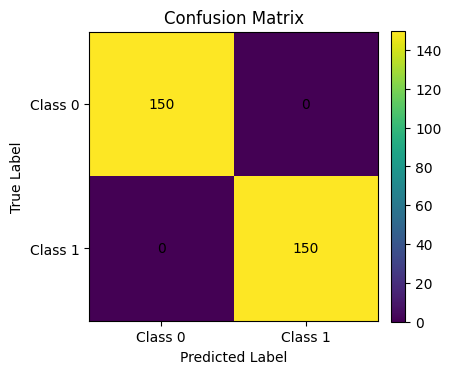

In [10]:
# 5) Confusion Matrix (with labels)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4.5, 4))
im = plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix")
plt.colorbar(im, fraction=0.046, pad=0.04)
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Class 0", "Class 1"])
plt.yticks(tick_marks, ["Class 0", "Class 1"])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

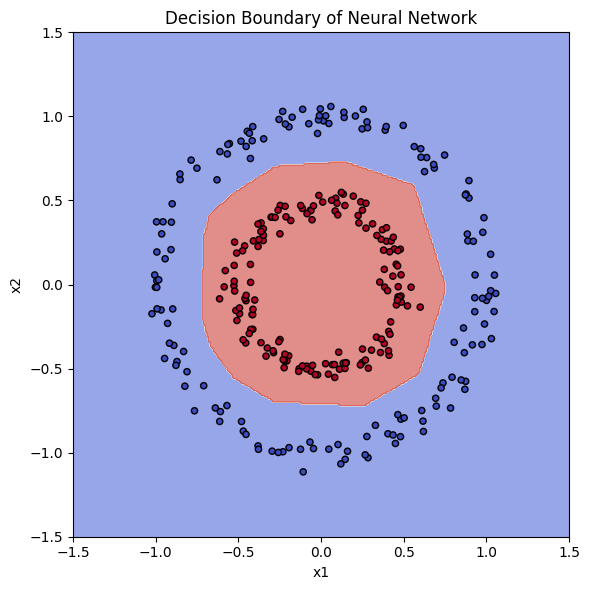

In [11]:
# 6) Decision boundary (class regions)
xx, yy = np.meshgrid(
    np.linspace(-1.5, 1.5, 300),
    np.linspace(-1.5, 1.5, 300)
)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm,
            edgecolors="k", s=20)
plt.title("Decision Boundary of Neural Network")
plt.xlabel("x1"); plt.ylabel("x2"); plt.tight_layout()
plt.show()

Analysis of Circular Data Classification Results
1. Dataset Visualization

* The generated dataset forms two concentric circles, representing Class 0 (outer ring) and Class 1 (inner ring).

* This is a classic non-linear classification problem where simple linear models would fail.

2. Decision Boundary of Neural Network

* The neural network (2 hidden layers with 16 neurons each, ReLU activation, Adam optimizer) perfectly learned the circular separation.

* The red region corresponds to Class 1 (inner circle), and the blue region to Class 0 (outer circle).

* The boundary is smooth and tightly fits the rings, showing that the model has captured the non-linear relationship very well.

3. Confusion Matrix

* The confusion matrix shows:

  * 150 correct predictions for Class 0.

  * 150 correct predictions for Class 1.

  * 0 misclassifications.

* This means the classifier achieved perfect separation on the test set.

4. Classification Report

Metric	  Class 0	    Class 1	Accuracy / Avg

Precision	1.0	1.0	1.0

Recall	1.0	1.0	1.0

F1-score	1.0	1.0	1.0

Support	150	150	300 total

* Accuracy: 100%

* Precision, Recall, F1-score: all equal to 1.0 for both classes.

* Macro and Weighted averages are also 1.0, showing balance between the classes.

5. Interpretation

* The model achieved perfect classification on this dataset.

* Since the dataset is relatively simple (well-separated concentric circles with low noise), the neural network had sufficient capacity to fully learn the decision boundary.

* There are no signs of underfitting or overfitting in this experiment.

6. Key Takeaways

* Neural networks can easily handle non-linear classification problems that linear models fail at.

* With proper architecture (ReLU activations, multiple hidden layers), the model can capture complex geometric boundaries.

* For more realistic or noisy data, performance may drop, and techniques like regularization, dropout, or tuning hidden units would be useful.